In [1]:
# #import commands for first time you runnging the frondend:
# !pip install requests
# !pip install time
# !pip install schedule
# !pip install IPython
# !pip install ipywidgets
# !pip install pandas
# !pip install --upgrade matplotlib
# !pip install plotly
# !pip install numpy
# !pip install termcolor

In [2]:
#imports
import requests
import time
import schedule

import json
from IPython import display
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Label, TwoByTwoLayout, interact

import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import numpy as np
import random

from datetime import datetime
from termcolor import colored
from IPython.display import HTML

In [3]:
#hiding the code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Dropdown Select Sensor with ID

In [4]:
#Select one Sensor:
# Example with Dropdown Box

out = widgets.Output(layout={'border': '1px solid black'})

drpdwn = widgets.Dropdown(
    options=[('5b8449037c519100190fc72c', 1), ('5d76badc953683001aa283f5', 2), ('5d76badc953683001aa283ef', 3)],
    value=1,
)

display.display(HBox([Label('PM10-Sensor ID:'), drpdwn]))

btnBoxes = widgets.Button(
    description='select sensorbox',
    disabled=False,
    button_style='info',
    tooltip='search',
    icon='check'
)
# 'success', 'info', 'warning', 'danger' or ''

display.display(btnBoxes)

def sensors_selected(button):
#     for box in drpdwn.value:
#     with out:
    out.clear_output()
    with out:
        print("selected sensorbox: " + str(drpdwn.value))
        
btnBoxes.on_click(sensors_selected)
display.display(out)

Button(button_style='info', description='select sensorbox', icon='check', style=ButtonStyle(), tooltip='search…

Output(layout=Layout(border='1px solid black'))

Button + Print Map with point of Sensor

Button(button_style='info', description='show map', icon='check', style=ButtonStyle(), tooltip='search')

Output(layout=Layout(border='1px solid black'))

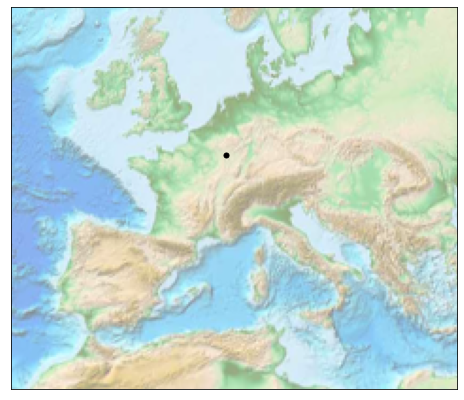

In [5]:
outMap = widgets.Output(layout={'border': '1px solid black'})

def plot_map(sensor_ID):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution=None,
                width=3.5E6, height=3E6, 
                lat_0=46.3, lon_0=6.68,)
    m.etopo(scale=0.5, alpha=0.5)

    # Map (long, lat) to (x, y) for plotting
    
    if sensor_ID == 1:
        x, y = m(7.854577, 47.993157)
        if sensor_ID == 2:
            x, y = m(7.57327, 47.55839)
            if sensor_ID == 3:
                x, y = m(7.57327, 47.55839)
    plt.plot(y, x, 'ok', markersize=5)
    

mapSens = widgets.Button(
    description='show map',
    disabled=False,
    button_style='info',
    tooltip='search',
    icon='check'
)

display.display(mapSens)

def sensors_plot(button):
#     for box in drpdwn.value:
#     with out:
    outMap.clear_output()
    with outMap:
        plot_map(drpdwn.value)
        
mapSens.on_click(sensors_plot)
display.display(outMap)    

# from ipyleaflet import Map
# Map(center=[34.6252978589571, -77.34580993652344], zoom=10)

Button + Consume Data from Kafka Topic + print last Hour

In [6]:
#what we need as an input is the cleaned list of measured values for the last hour and their timestamps:

# last_1_hour_Measurement = pd.date_range(datetime.today(), periods=15).tolist()
# last_1_hour_value_PM10 = random.sample(range(0,80), 15)

#what arrives from kafka (example from Dina)

# received_message = [
# {"value":"5.70","location":[7.585112,47.555994],"createdAt":"2020-05-20T11:07:17.775Z"}
# ,{"value":"8.68","location":[7.585112,47.555994],"createdAt":"2020-05-20T11:02:12.982Z"}
# ,{"value":"6.78","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:57:08.315Z"}
# ,{"value":"6.50","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:52:03.664Z"}
# ,{"value":"7.85","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:46:56.320Z"}
# ,{"value":"6.37","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:41:51.776Z"}
# ,{"value":"7.12","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:36:46.921Z"}
# ,{"value":"4.68","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:31:42.145Z"}
# ,{"value":"4.75","location":[7.585112,47.555994],"createdAt":"2020-05-20T10:26:37.807Z"}
# ]

# def convert_kafka_message_tolist(received_message):
#     global last_1_hour_Measurement, last_1_hour_value_PM10
#     last_1_hour_Measurement = []
#     last_1_hour_value_PM10 = []

#     for entry in received_message:
#         last_1_hour_Measurement.append([entry.get('createdAt')])
#         last_1_hour_value_PM10.append(entry.get('value'))
    

# Or in case Kafka produces directly the lists (Dina)

last_1_hour_Measurement = ['2020-05-20T13:54:11.817Z', '2020-05-20T13:49:07.231Z', '2020-05-20T13:44:00.735Z', '2020-05-20T13:38:53.423Z', '2020-05-20T13:33:46.667Z', '2020-05-20T13:28:42.522Z', '2020-05-20T13:23:37.791Z', '2020-05-20T13:18:33.328Z', '2020-05-20T13:13:28.824Z', '2020-05-20T13:08:03.294Z', '2020-05-20T13:02:34.586Z', '2020-05-20T12:51:48.639Z', '2020-05-20T12:46:24.853Z', '2020-05-20T12:41:09.712Z', '2020-05-20T12:35:51.843Z', '2020-05-20T12:30:28.894Z', '2020-05-20T12:19:30.007Z', '2020-05-20T12:14:07.160Z', '2020-05-20T12:08:29.605Z', '2020-05-20T12:03:24.969Z', '2020-05-20T11:58:20.381Z', '2020-05-20T11:53:15.977Z', '2020-05-20T11:48:06.216Z', '2020-05-20T11:43:01.978Z', '2020-05-20T11:37:57.625Z', '2020-05-20T11:32:50.258Z', '2020-05-20T11:27:45.171Z', '2020-05-20T11:22:37.327Z', '2020-05-20T11:17:32.560Z', '2020-05-20T11:12:27.915Z', '2020-05-20T11:07:17.775Z', '2020-05-20T11:02:12.982Z', '2020-05-20T10:57:08.315Z', '2020-05-20T10:52:03.664Z', '2020-05-20T10:46:56.320Z', '2020-05-20T10:41:51.776Z', '2020-05-20T10:36:46.921Z', '2020-05-20T10:31:42.145Z', '2020-05-20T10:26:37.807Z', '2020-05-20T10:21:33.426Z', '2020-05-20T10:16:28.635Z', '2020-05-20T10:11:23.172Z', '2020-05-20T10:06:18.439Z', '2020-05-20T10:01:13.046Z', '2020-05-20T09:55:59.763Z', '2020-05-20T09:50:36.579Z', '2020-05-20T09:39:33.580Z', '2020-05-20T09:34:17.319Z', '2020-05-20T09:29:11.494Z', '2020-05-20T09:24:05.675Z', '2020-05-20T09:13:07.864Z', '2020-05-20T09:07:45.266Z', '2020-05-20T09:02:40.975Z', '2020-05-20T08:57:33.770Z', '2020-05-20T08:52:29.516Z', '2020-05-20T08:47:24.192Z', '2020-05-20T08:42:13.578Z', '2020-05-20T08:36:39.834Z', '2020-05-20T08:31:03.598Z', '2020-05-20T08:25:43.541Z', '2020-05-20T08:20:33.274Z', '2020-05-20T08:15:22.942Z', '2020-05-20T08:04:34.267Z', '2020-05-20T07:59:11.237Z', '2020-05-20T07:54:06.260Z', '2020-05-20T07:48:59.569Z', '2020-05-20T07:43:36.489Z', '2020-05-20T07:38:19.784Z', '2020-05-20T07:32:45.925Z', '2020-05-20T07:27:28.365Z', '2020-05-20T07:21:55.878Z', '2020-05-20T07:16:51.710Z', '2020-05-20T07:11:28.842Z', '2020-05-20T07:06:15.453Z', '2020-05-20T07:00:48.090Z', '2020-05-20T06:55:24.404Z', '2020-05-20T06:50:04.503Z', '2020-05-20T06:44:50.770Z', '2020-05-20T06:39:29.360Z', '2020-05-20T06:34:01.908Z', '2020-05-20T06:28:44.953Z', '2020-05-20T06:23:22.336Z', '2020-05-20T06:18:11.607Z', '2020-05-20T06:12:34.654Z', '2020-05-20T06:06:57.724Z', '2020-05-20T06:01:34.699Z', '2020-05-20T05:56:27.400Z', '2020-05-20T05:51:04.022Z', '2020-05-20T05:45:33.105Z', '2020-05-20T05:40:10.205Z', '2020-05-20T05:34:46.010Z', '2020-05-20T05:29:23.025Z', '2020-05-20T05:23:59.562Z', '2020-05-20T05:18:36.521Z', '2020-05-20T05:13:20.955Z', '2020-05-20T05:02:33.183Z', '2020-05-20T04:57:10.154Z', '2020-05-20T04:52:05.697Z', '2020-05-20T04:46:48.621Z', '2020-05-20T04:41:24.834Z', '2020-05-20T04:30:56.315Z', '2020-05-20T04:25:32.525Z', '2020-05-20T04:20:09.076Z', '2020-05-20T04:14:46.540Z', '2020-05-20T04:09:25.551Z', '2020-05-20T04:04:00.613Z', '2020-05-20T03:58:26.506Z', '2020-05-20T03:53:03.207Z', '2020-05-20T03:47:40.564Z', '2020-05-20T03:42:16.629Z', '2020-05-20T03:37:02.645Z', '2020-05-20T03:26:20.282Z', '2020-05-20T03:20:57.014Z', '2020-05-20T03:15:52.847Z', '2020-05-20T03:10:48.326Z', '2020-05-20T03:05:42.877Z', '2020-05-20T03:00:38.507Z', '2020-05-20T02:55:34.141Z', '2020-05-20T02:50:29.094Z', '2020-05-20T02:45:24.903Z', '2020-05-20T02:40:19.499Z', '2020-05-20T02:35:14.070Z', '2020-05-20T02:30:09.808Z', '2020-05-20T02:25:05.271Z', '2020-05-20T02:19:59.873Z', '2020-05-20T02:14:37.214Z', '2020-05-20T02:09:32.006Z', '2020-05-20T02:03:51.455Z', '2020-05-20T01:58:42.107Z', '2020-05-20T01:53:37.753Z', '2020-05-20T01:48:33.073Z', '2020-05-20T01:43:28.605Z', '2020-05-20T01:38:24.124Z', '2020-05-20T01:33:19.378Z', '2020-05-20T01:28:15.137Z', '2020-05-20T01:23:10.827Z', '2020-05-20T01:18:05.903Z', '2020-05-20T01:12:41.975Z', '2020-05-20T01:07:31.720Z', '2020-05-20T01:02:27.559Z', '2020-05-20T00:57:18.401Z', '2020-05-20T00:52:11.547Z', '2020-05-20T00:47:07.079Z', '2020-05-20T00:41:59.715Z', '2020-05-20T00:36:37.183Z', '2020-05-20T00:31:32.851Z', '2020-05-20T00:26:27.697Z', '2020-05-20T00:21:23.224Z', '2020-05-20T00:16:14.746Z', '2020-05-20T00:11:10.010Z', '2020-05-20T00:06:04.781Z', '2020-05-20T00:00:59.765Z', '2020-05-19T23:55:54.396Z', '2020-05-19T23:50:50.139Z', '2020-05-19T23:45:45.900Z', '2020-05-19T23:40:38.877Z', '2020-05-19T23:35:34.426Z', '2020-05-19T23:30:27.517Z', '2020-05-19T23:25:11.708Z', '2020-05-19T23:20:07.378Z', '2020-05-19T23:15:03.192Z', '2020-05-19T23:09:55.710Z', '2020-05-19T23:04:49.992Z', '2020-05-19T22:59:45.602Z', '2020-05-19T22:54:38.872Z', '2020-05-19T22:49:34.782Z', '2020-05-19T22:44:26.876Z', '2020-05-19T22:39:22.046Z', '2020-05-19T22:34:17.539Z', '2020-05-19T22:29:03.970Z', '2020-05-19T22:22:47.470Z', '2020-05-19T22:09:51.168Z', '2020-05-19T22:03:27.837Z', '2020-05-19T21:58:23.623Z', '2020-05-19T21:53:19.223Z', '2020-05-19T21:48:12.593Z', '2020-05-19T21:43:06.834Z', '2020-05-19T21:37:59.887Z', '2020-05-19T21:32:40.040Z', '2020-05-19T21:27:35.699Z', '2020-05-19T21:22:30.683Z', '2020-05-19T21:17:25.350Z', '2020-05-19T21:12:11.699Z', '2020-05-19T21:07:07.608Z', '2020-05-19T21:02:02.917Z', '2020-05-19T20:56:50.951Z', '2020-05-19T20:51:40.575Z', '2020-05-19T20:46:32.446Z', '2020-05-19T20:41:17.325Z', '2020-05-19T20:36:13.050Z', '2020-05-19T20:31:00.953Z', '2020-05-19T20:25:53.056Z', '2020-05-19T20:20:48.930Z', '2020-05-19T20:15:43.491Z', '2020-05-19T20:10:39.238Z', '2020-05-19T20:05:34.085Z', '2020-05-19T20:00:28.778Z', '2020-05-19T19:55:23.109Z', '2020-05-19T19:50:18.665Z', '2020-05-19T19:45:13.935Z', '2020-05-19T19:40:09.624Z', '2020-05-19T19:34:58.141Z', '2020-05-19T19:29:53.203Z', '2020-05-19T19:24:45.986Z', '2020-05-19T19:19:41.571Z', '2020-05-19T19:14:24.699Z', '2020-05-19T19:09:18.701Z', '2020-05-19T19:04:14.079Z', '2020-05-19T18:59:09.084Z', '2020-05-19T18:54:04.543Z', '2020-05-19T18:48:58.287Z', '2020-05-19T18:43:52.026Z', '2020-05-19T18:38:44.697Z', '2020-05-19T18:33:37.659Z', '2020-05-19T18:28:31.662Z', '2020-05-19T18:23:27.159Z', '2020-05-19T18:18:21.616Z', '2020-05-19T18:13:08.323Z', '2020-05-19T18:08:03.373Z', '2020-05-19T18:02:58.872Z', '2020-05-19T17:57:51.082Z', '2020-05-19T17:52:46.470Z', '2020-05-19T17:47:42.237Z', '2020-05-19T17:42:28.804Z', '2020-05-19T17:37:24.479Z', '2020-05-19T17:32:14.258Z', '2020-05-19T17:27:09.285Z', '2020-05-19T17:22:04.910Z', '2020-05-19T17:17:00.109Z', '2020-05-19T17:11:36.702Z', '2020-05-19T17:06:32.326Z', '2020-05-19T17:01:27.846Z', '2020-05-19T16:55:53.519Z', '2020-05-19T16:50:49.216Z', '2020-05-19T16:45:44.505Z', '2020-05-19T16:40:33.627Z', '2020-05-19T16:35:28.854Z', '2020-05-19T16:30:22.154Z', '2020-05-19T16:25:16.263Z', '2020-05-19T16:20:11.957Z', '2020-05-19T16:14:54.872Z', '2020-05-19T16:09:46.666Z', '2020-05-19T16:04:38.587Z', '2020-05-19T15:59:10.272Z', '2020-05-19T15:53:48.288Z', '2020-05-19T15:48:28.967Z', '2020-05-19T15:43:18.223Z', '2020-05-19T15:38:13.051Z', '2020-05-19T15:33:07.804Z', '2020-05-19T15:27:54.149Z', '2020-05-19T15:22:48.848Z', '2020-05-19T15:17:19.662Z', '2020-05-19T15:12:12.843Z', '2020-05-19T15:07:07.937Z', '2020-05-19T15:02:03.067Z', '2020-05-19T14:56:58.586Z', '2020-05-19T14:51:53.619Z', '2020-05-19T14:46:48.893Z', '2020-05-19T14:41:40.663Z', '2020-05-19T14:36:14.386Z', '2020-05-19T14:30:46.757Z', '2020-05-19T14:25:40.143Z', '2020-05-19T14:20:14.807Z', '2020-05-19T14:14:51.836Z', '2020-05-19T14:09:28.099Z', '2020-05-19T14:04:20.699Z', '2020-05-19T13:58:50.457Z', '2020-05-19T13:53:27.497Z', '2020-05-19T13:48:03.509Z', '2020-05-19T13:42:22.174Z', '2020-05-19T13:36:59.403Z', '2020-05-19T13:31:36.015Z', '2020-05-19T13:26:08.664Z', '2020-05-19T13:20:40.977Z', '2020-05-19T13:15:09.502Z', '2020-05-19T13:10:00.341Z', '2020-05-19T13:04:44.195Z', '2020-05-19T12:59:06.955Z', '2020-05-19T12:53:42.734Z', '2020-05-19T12:48:23.314Z', '2020-05-19T12:43:18.067Z', '2020-05-19T12:38:10.208Z', '2020-05-19T12:33:05.736Z', '2020-05-19T12:27:58.001Z', '2020-05-19T12:22:52.688Z', '2020-05-19T12:17:42.120Z', '2020-05-19T12:12:37.094Z', '2020-05-19T12:07:32.563Z', '2020-05-19T12:02:27.617Z', '2020-05-19T11:57:22.617Z', '2020-05-19T11:52:17.972Z', '2020-05-19T11:47:13.567Z', '2020-05-19T11:42:08.746Z', '2020-05-19T11:37:01.692Z', '2020-05-19T11:31:57.072Z', '2020-05-19T11:26:49.849Z', '2020-05-19T11:21:45.301Z', '2020-05-19T11:16:41.011Z', '2020-05-19T11:11:36.172Z', '2020-05-19T11:06:31.737Z', '2020-05-19T11:01:27.439Z', '2020-05-19T10:56:22.325Z', '2020-05-19T10:51:17.483Z', '2020-05-19T10:46:12.925Z', '2020-05-19T10:41:05.523Z', '2020-05-19T10:35:37.997Z', '2020-05-19T10:30:32.873Z', '2020-05-19T10:25:13.098Z', '2020-05-19T10:20:06.451Z', '2020-05-19T10:15:00.555Z', '2020-05-19T10:09:53.139Z', '2020-05-19T10:04:48.854Z', '2020-05-19T09:59:33.745Z', '2020-05-19T09:54:28.868Z', '2020-05-19T09:49:24.389Z', '2020-05-19T09:44:19.694Z', '2020-05-19T09:39:14.803Z', '2020-05-19T09:34:10.301Z', '2020-05-19T09:29:05.526Z', '2020-05-19T09:24:00.838Z', '2020-05-19T09:18:55.971Z', '2020-05-19T09:13:48.514Z', '2020-05-19T09:08:43.461Z', '2020-05-19T09:03:38.874Z', '2020-05-19T08:58:34.493Z', '2020-05-19T08:53:29.622Z', '2020-05-19T08:48:25.321Z', '2020-05-19T08:43:21.010Z', '2020-05-19T08:38:16.230Z', '2020-05-19T08:33:11.917Z', '2020-05-19T08:28:07.341Z', '2020-05-19T08:22:57.646Z', '2020-05-19T08:17:52.875Z', '2020-05-19T08:12:45.325Z', '2020-05-19T08:07:38.253Z', '2020-05-19T08:02:26.281Z', '2020-05-19T07:57:02.612Z', '2020-05-19T07:51:22.864Z', '2020-05-19T07:46:18.550Z', '2020-05-19T07:41:14.105Z', '2020-05-19T07:36:03.285Z', '2020-05-19T07:30:57.012Z', '2020-05-19T07:25:49.971Z', '2020-05-19T07:20:44.941Z', '2020-05-19T07:15:40.404Z', '2020-05-19T07:10:33.235Z', '2020-05-19T07:05:17.369Z', '2020-05-19T07:00:10.538Z', '2020-05-19T06:55:04.505Z', '2020-05-19T06:50:00.130Z', '2020-05-19T06:44:55.036Z', '2020-05-19T06:39:47.381Z', '2020-05-19T06:34:43.176Z', '2020-05-19T06:29:37.458Z', '2020-05-19T06:24:31.348Z', '2020-05-19T06:19:23.222Z', '2020-05-19T06:14:18.214Z', '2020-05-19T06:09:12.508Z', '2020-05-19T06:04:07.169Z', '2020-05-19T05:59:01.561Z', '2020-05-19T05:53:56.780Z', '2020-05-19T05:48:49.200Z', '2020-05-19T05:43:29.942Z', '2020-05-19T05:38:19.435Z', '2020-05-19T05:33:02.168Z', '2020-05-19T05:27:53.522Z', '2020-05-19T05:22:46.854Z', '2020-05-19T05:17:39.518Z', '2020-05-19T05:12:34.327Z', '2020-05-19T05:07:28.635Z', '2020-05-19T05:02:22.033Z', '2020-05-19T04:57:16.302Z', '2020-05-19T04:51:54.489Z', '2020-05-19T04:46:30.434Z', '2020-05-19T04:41:23.060Z', '2020-05-19T04:35:59.992Z', '2020-05-19T04:30:52.593Z', '2020-05-19T04:25:29.124Z', '2020-05-19T04:20:11.821Z', '2020-05-19T04:14:55.123Z', '2020-05-19T04:09:46.890Z', '2020-05-19T04:04:26.590Z', '2020-05-19T03:59:02.808Z', '2020-05-19T03:53:55.360Z', '2020-05-19T03:48:39.588Z', '2020-05-19T03:43:17.455Z', '2020-05-19T03:37:54.194Z', '2020-05-19T03:32:35.138Z', '2020-05-19T03:27:30.529Z', '2020-05-19T03:22:25.500Z', '2020-05-19T03:17:19.383Z', '2020-05-19T03:12:14.258Z', '2020-05-19T03:07:02.692Z', '2020-05-19T03:01:39.628Z', '2020-05-19T02:56:32.368Z', '2020-05-19T02:51:24.743Z', '2020-05-19T02:46:12.066Z', '2020-05-19T02:41:05.341Z', '2020-05-19T02:35:54.971Z', '2020-05-19T02:30:50.564Z', '2020-05-19T02:25:46.323Z', '2020-05-19T02:20:41.422Z', '2020-05-19T02:10:31.995Z', '2020-05-19T02:05:18.815Z', '2020-05-19T01:59:16.480Z', '2020-05-19T01:54:01.365Z', '2020-05-19T01:48:56.009Z', '2020-05-19T01:43:51.514Z', '2020-05-19T01:38:44.859Z', '2020-05-19T01:33:38.996Z', '2020-05-19T01:28:20.394Z', '2020-05-19T01:23:14.293Z', '2020-05-19T01:18:09.183Z', '2020-05-19T01:13:00.257Z', '2020-05-19T01:07:40.471Z', '2020-05-19T01:02:13.897Z', '2020-05-19T00:56:58.331Z', '2020-05-19T00:51:47.808Z', '2020-05-19T00:46:43.262Z', '2020-05-19T00:41:18.182Z', '2020-05-19T00:35:55.230Z', '2020-05-19T00:30:44.996Z', '2020-05-19T00:25:15.477Z', '2020-05-19T00:20:01.877Z', '2020-05-19T00:14:37.234Z', '2020-05-19T00:04:09.247Z', '2020-05-18T23:58:44.165Z', '2020-05-18T23:53:38.625Z', '2020-05-18T23:48:32.912Z', '2020-05-18T23:43:25.611Z', '2020-05-18T23:38:09.547Z', '2020-05-18T23:32:46.295Z', '2020-05-18T23:22:22.557Z', '2020-05-18T23:16:59.289Z', '2020-05-18T23:11:42.399Z', '2020-05-18T23:06:08.052Z', '2020-05-18T23:01:02.908Z', '2020-05-18T22:55:46.581Z', '2020-05-18T22:44:50.724Z', '2020-05-18T22:39:46.207Z', '2020-05-18T22:34:29.604Z', '2020-05-18T22:29:06.545Z', '2020-05-18T22:23:19.184Z', '2020-05-18T22:16:32.449Z', '2020-05-18T22:09:24.136Z', '2020-05-18T21:32:44.389Z', '2020-05-18T21:19:32.274Z', '2020-05-18T21:13:38.057Z', '2020-05-18T21:07:53.669Z', '2020-05-18T21:02:28.758Z', '2020-05-18T20:51:28.138Z', '2020-05-18T20:46:05.107Z', '2020-05-18T20:40:38.660Z', '2020-05-18T20:35:10.682Z', '2020-05-18T20:29:34.367Z', '2020-05-18T20:24:26.556Z', '2020-05-18T20:19:03.916Z', '2020-05-18T20:13:25.510Z', '2020-05-18T20:07:48.258Z', '2020-05-18T20:02:25.901Z', '2020-05-18T19:56:58.101Z', '2020-05-18T19:51:30.274Z', '2020-05-18T19:46:07.408Z', '2020-05-18T19:41:02.357Z', '2020-05-18T19:35:38.569Z', '2020-05-18T19:30:28.670Z', '2020-05-18T19:19:32.148Z', '2020-05-18T19:14:09.420Z', '2020-05-18T19:08:44.467Z', '2020-05-18T19:03:18.735Z', '2020-05-18T18:57:53.963Z', '2020-05-18T18:52:18.692Z', '2020-05-18T18:46:55.222Z', '2020-05-18T18:41:32.258Z', '2020-05-18T18:31:06.275Z', '2020-05-18T18:25:25.391Z', '2020-05-18T18:20:15.057Z', '2020-05-18T18:14:51.352Z', '2020-05-18T18:09:22.716Z', '2020-05-18T18:03:40.518Z', '2020-05-18T17:58:16.584Z', '2020-05-18T17:52:53.021Z', '2020-05-18T17:47:17.296Z', '2020-05-18T17:41:49.541Z', '2020-05-18T17:36:26.348Z', '2020-05-18T17:31:01.126Z', '2020-05-18T17:25:35.821Z', '2020-05-18T17:19:56.341Z', '2020-05-18T17:14:32.279Z', '2020-05-18T17:09:19.655Z', '2020-05-18T17:04:11.671Z', '2020-05-18T16:58:44.303Z', '2020-05-18T16:53:30.060Z', '2020-05-18T16:48:17.048Z', '2020-05-18T16:42:53.225Z', '2020-05-18T16:37:22.800Z', '2020-05-18T16:31:59.614Z', '2020-05-18T16:26:49.279Z', '2020-05-18T16:21:25.738Z', '2020-05-18T16:16:09.303Z', '2020-05-18T16:10:44.739Z', '2020-05-18T16:05:21.195Z', '2020-05-18T15:59:58.203Z', '2020-05-18T15:54:35.453Z', '2020-05-18T15:49:09.752Z', '2020-05-18T15:43:30.352Z', '2020-05-18T15:37:53.658Z', '2020-05-18T15:32:45.764Z', '2020-05-18T15:27:39.472Z', '2020-05-18T15:22:29.600Z', '2020-05-18T15:17:22.477Z', '2020-05-18T15:12:17.799Z', '2020-05-18T15:07:13.714Z', '2020-05-18T15:02:08.813Z', '2020-05-18T14:57:03.272Z', '2020-05-18T14:51:52.675Z', '2020-05-18T14:46:29.449Z', '2020-05-18T14:41:19.185Z', '2020-05-18T14:35:50.278Z', '2020-05-18T14:30:25.272Z', '2020-05-18T14:24:59.496Z', '2020-05-18T14:19:41.114Z', '2020-05-18T14:14:30.002Z', '2020-05-18T14:09:25.880Z', '2020-05-18T14:04:20.382Z']
last_1_hour_value_PM10 = ['4.43', '3.87', '3.90', '7.87', '4.80', '4.82', '4.50', '5.78', '9.18', '7.03', '5.85', '6.05', '5.30', '4.03', '3.22', '4.75', '7.50', '5.53', '4.22', '4.03', '3.28', '7.80', '7.45', '7.35', '10.43', '6.00', '5.87', '3.47', '5.18', '5.30', '5.70', '8.68', '6.78', '6.50', '7.85', '6.37', '7.12', '4.68', '4.75', '8.10', '7.40', '11.07', '11.38', '6.57', '4.43', '5.43', '7.70', '5.82', '5.93', '5.97', '6.85', '8.40', '7.07', '7.65', '8.48', '12.27', '12.52', '13.50', '6.85', '8.88', '8.98', '11.20', '9.25', '9.68', '10.98', '6.97', '11.07', '9.90', '11.32', '13.10', '9.88', '7.85', '7.32', '17.87', '12.85', '8.50', '14.40', '7.30', '9.00', '9.27', '13.73', '9.05', '9.90', '9.80', '9.20', '9.38', '10.50', '10.30', '6.50', '6.70', '9.25', '7.07', '8.40', '7.93', '10.00', '5.57', '8.80', '5.47', '4.90', '5.40', '6.75', '6.37', '3.53', '6.75', '8.45', '7.45', '7.10', '7.85', '2.85', '4.75', '4.57', '7.45', '7.37', '4.32', '6.80', '11.68', '6.30', '4.45', '3.72', '6.57', '7.18', '3.75', '4.62', '6.22', '7.60', '6.80', '11.90', '7.32', '4.15', '6.25', '7.25', '6.15', '6.57', '5.62', '5.68', '7.90', '6.18', '5.82', '4.20', '5.03', '3.05', '5.78', '7.50', '6.00', '5.55', '4.37', '4.53', '5.10', '4.78', '6.20', '4.85', '4.12', '5.53', '3.97', '5.68', '5.12', '5.07', '8.07', '7.15', '6.37', '3.97', '5.65', '3.15', '8.00', '8.07', '4.70', '5.55', '3.42', '5.57', '6.47', '5.00', '4.82', '6.57', '8.13', '4.40', '4.00', '4.60', '5.55', '6.32', '5.87', '3.67', '3.30', '5.37', '2.23', '3.83', '2.67', '3.30', '3.28', '3.12', '4.03', '6.18', '3.20', '2.53', '2.60', '3.15', '3.08', '3.00', '5.87', '4.65', '4.50', '8.25', '4.80', '3.35', '5.35', '3.85', '6.85', '3.00', '2.42', '4.40', '6.35', '1.90', '6.05', '3.08', '2.85', '3.90', '2.47', '5.20', '3.40', '3.50', '3.42', '8.63', '4.37', '4.60', '3.72', '5.07', '4.05', '6.15', '4.07', '4.30', '8.45', '34.08', '15.98', '8.65', '6.97', '5.75', '5.43', '4.70', '7.68', '7.90', '4.93', '4.07', '4.73', '4.55', '6.47', '4.30', '4.85', '5.65', '6.18', '4.22', '3.75', '4.25', '5.50', '4.45', '4.97', '13.00', '5.97', '5.15', '5.22', '5.45', '3.75', '8.13', '4.53', '5.75', '5.53', '3.20', '5.05', '4.62', '7.97', '5.75', '6.22', '4.53', '3.95', '2.67', '3.12', '4.28', '6.10', '4.32', '4.35', '4.03', '7.55', '5.37', '5.20', '7.07', '7.97', '5.32', '4.15', '6.30', '7.62', '6.28', '7.15', '5.10', '5.43', '6.95', '10.38', '7.03', '7.03', '7.70', '6.78', '6.70', '7.03', '8.30', '6.28', '7.95', '6.22', '7.57', '5.37', '9.30', '9.48', '8.10', '13.18', '8.52', '8.65', '12.10', '7.78', '9.50', '8.18', '8.75', '11.85', '6.18', '8.90', '10.07', '7.68', '14.75', '7.15', '11.68', '7.78', '12.40', '8.60', '8.07', '10.68', '10.57', '9.02', '5.50', '6.87', '6.80', '7.07', '9.00', '9.10', '21.33', '15.00', '13.10', '13.05', '12.52', '13.20', '13.88', '13.27', '14.55', '15.85', '21.05', '17.52', '9.68', '10.50', '9.98', '8.60', '9.77', '8.90', '10.05', '9.18', '9.60', '10.25', '7.28', '9.43', '8.15', '5.70', '8.68', '10.32', '8.32', '8.30', '9.07', '7.87', '5.97', '7.30', '7.32', '6.40', '6.68', '7.20', '6.57', '8.13', '6.90', '6.12', '7.75', '5.62', '4.30', '7.28', '5.82', '6.32', '5.28', '4.65', '4.65', '6.75', '4.60', '5.18', '5.95', '5.05', '5.68', '6.07', '6.85', '5.25', '8.30', '8.25', '5.45', '9.20', '5.03', '4.15', '4.55', '4.07', '6.22', '3.60', '5.15', '4.93', '3.20', '4.45', '3.55', '4.47', '5.30', '6.35', '3.65', '5.62', '5.78', '4.97', '4.18', '5.25', '4.05', '4.10', '4.18', '5.32', '8.07', '4.43', '3.37', '3.58', '3.97', '5.70', '6.30', '5.32', '4.78', '5.12', '3.70', '4.85', '6.47', '3.47', '6.93', '2.97', '4.18', '5.18', '3.00', '5.15', '4.25', '7.75', '3.47', '7.00', '3.33', '3.42', '5.85', '5.25', '5.43', '2.95', '3.60', '6.10', '7.37', '3.53', '4.78', '3.30', '4.28', '4.95', '2.72', '4.68', '3.03', '2.42', '4.10', '10.80', '4.10', '3.90', '6.30', '2.33', '3.72', '4.03', '5.00', '3.62', '7.80', '3.83', '7.20', '3.62', '4.60', '4.07', '3.62', '3.47', '4.62', '3.70', '4.68', '3.83', '5.65', '5.85', '3.08', '5.35', '4.97', '5.00', '3.95', '4.30', '3.00', '3.10', '3.90', '2.60', '4.15', '4.18', '4.15', '2.92', '2.70', '5.32', '6.15', '5.60', '3.40', '9.73', '6.45', '6.70', '6.60', '10.00', '7.87', '9.00', '6.60', '7.55', '7.05', '6.53', '10.32', '9.65', '9.48']


In [7]:
outPlot = widgets.Output(layout={'border': '1px solid black'})

# colors = ['green', 'red', 'orange']

def plot_hist(last_1_hour_Measurement, last_1_hour_value_PM10):
    hist_data = {'lastMeasurement': last_1_hour_Measurement, 
               'value_PM10': last_1_hour_value_PM10}

    df = pd.DataFrame(hist_data, columns=['lastMeasurement', 'value_PM10'])
    fig = px.bar(df, x='lastMeasurement', y='value_PM10', color='value_PM10')
    fig.show()

mapPM10 = widgets.Button(
    description='show data PM10',
    disabled=False,
    button_style='warning',
    tooltip='search',
    icon='check'
)

display.display(mapPM10)

def valuePM10_plot(button):
#     for box in drpdwn.value:
#     with outPlot:
    outPlot.clear_output()
    with outPlot:
        plot_hist(last_1_hour_Measurement, last_1_hour_value_PM10)
        
mapPM10.on_click(valuePM10_plot)
display.display(outPlot)    

Button(button_style='warning', description='show data PM10', icon='check', style=ButtonStyle(), tooltip='searc…

Output(layout=Layout(border='1px solid black'))

Button + Print "Traffic Light" with selecting thresholds

In [8]:
#what we need as an input is the last measured value for the sensor (or the history 1 hour) (extendable: the average for an hour ???):

In [9]:
outTrafficLight = widgets.Output(layout={'border': '1px solid black'})

slider_target = widgets.IntSlider(min=25, max=100, step=1, value=0)
display.display(HBox([Label('Threshold_Target: '), slider_target]))

slider_allowed = widgets.IntSlider(min=(slider_target.value), max=100, step=1, value=50)
display.display(HBox([Label('Threshold_Allowed: '), slider_allowed]))


def get_average(list_strings):  
    list_values = list_strings
    list_values = [float(i) for i in list_values]
    average = sum(list_values)/len(list_values)
    return average


def print_warning():
    global value    
    value = get_average(last_1_hour_value_PM10)
#     value = sum(float(last_1_hour_value_PM10))/len(last_1_hour_value_PM10)
    target_value = slider_target.value
    allowed_value = slider_allowed.value

    if value < target_value:
        print(colored('Fine: The Measurement of Sensor ' + str(drpdwn.value) +  ' is under the target PM10 value', 'green'))
    if value >= target_value and value < allowed_value:
        print(colored('Warning: The Measurement of Sensor ' + str(drpdwn.value) + ' exceeds the target PM10 value but is still below the allowed-value', 'yellow'))
    if value >= allowed_value:
        print(colored('Attention: The Measurement of Sensor ' + str(drpdwn.value) + ' exceeds the allowed PM10 value', 'red')) 


traffic_light = widgets.Button(
    description='show traffic light',
    disabled=False,
    button_style='',
    tooltip='search',
    icon='check'
)
# 'success', 'info', 'warning', 'danger' or ''

display.display(traffic_light)

def traffic_light_plot(button):
#     for box in drpdwn.value:
#     with outTrafficLight:
    outTrafficLight.clear_output()
    with outTrafficLight:
        print_warning()
        print(str(value) + ' μg/m³')
        
traffic_light.on_click(traffic_light_plot)
display.display(outTrafficLight)

Button(description='show traffic light', icon='check', style=ButtonStyle(), tooltip='search')

Output(layout=Layout(border='1px solid black'))